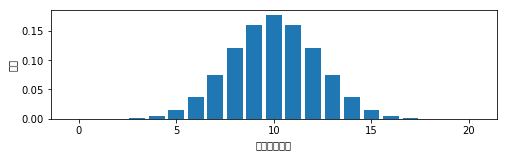

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

x = np.arange(0, 21)
# 2項分布
y = scipy.stats.binom.pmf(x, 20, 0.5)
plt.figure(figsize=(8, 2))
plt.bar(x, y)
plt.xlabel('表がでる回数')
plt.ylabel('確率')

In [17]:
import pandas as pd
p_value = pd.DataFrame({'表がでる回数':x ,'確率': y}).query(
    '表がでる回数 >= 15'
)['確率'].sum()
print(p_value)

0.02069473266601554


二群の母比率の差の検定
---------------------

In [2]:
# テストデータ、継続化人数、離脱人数
a = [40, 165]
b = [62, 228]

In [37]:
# 継続率=継続した人数/全体の人数
print('Sample A: size = {} converted = {}, mean = {:.3f}'.format(sum(a), a[0], a[0]/sum(a)))
print('Sample B: size = {} converted = {}, mean = {:.3f}'.format(sum(b), b[0], b[0]/sum(b)))

Sample A: size = 205 converted = 40, mean = 0.195
Sample B: size = 290 converted = 62, mean = 0.214


In [25]:
x = np.linspace(0, 1, 200)
# 流入元がAの標本
n = sum(a)
p = a[0]/n
std = np.sqrt(p * (1-p)/n)
# 統計的な関数はscipy.stats.xxxで表現されている
y_a = scipy.stats.norm.pdf(x, p, std)

0.1951219512195122


In [19]:
# 流入元がBの標本
n = sum(b)
p = b[0]/n
std = np.sqrt(p*(1-p)/n)
y_b = scipy.stats.norm.pdf(x, p, std)

[  1.24505508e-016   7.77537870e-016   4.64872086e-015   2.66087407e-014
   1.45812282e-013   7.64967219e-013   3.84211604e-012   1.84746859e-011
   8.50477016e-011   3.74823691e-010   1.58150445e-009   6.38840936e-009
   2.47055194e-008   9.14690514e-008   3.24215142e-007   1.10019925e-006
   3.57427803e-006   1.11169141e-005   3.31023710e-005   9.43654223e-005
   2.57540543e-004   6.72910428e-004   1.68324698e-003   4.03104237e-003
   9.24199684e-003   2.02858496e-002   4.26284479e-002   8.57600000e-002
   1.65176766e-001   3.04573474e-001   5.37667925e-001   9.08688673e-001
   1.47026302e+000   2.27747640e+000   3.37747133e+000   4.79521838e+000
   6.51784522e+000   8.48161644e+000   1.05665241e+001   1.26027291e+001
   1.43905034e+001   1.57313613e+001   1.64640076e+001   1.64961935e+001
   1.58238028e+001   1.45317164e+001   1.27762058e+001   1.07538957e+001
   8.66580020e+000   6.68544711e+000   4.93777364e+000   3.49149021e+000
   2.36357515e+000   1.53181717e+000   9.50437114e-

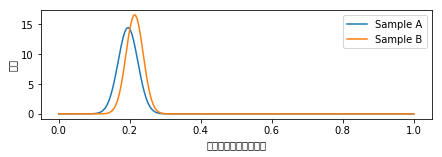

In [26]:
plt.figure(figsize=(7 , 2))
plt.plot(x, y_a, label = 'Sample A')
plt.plot(x, y_b, label = 'Sample B')
plt.legend(loc='best')
plt.xlabel('新規ユーザーの継続率')
plt.ylabel('尤度')

In [29]:
_, p_value, _, _= scipy.stats.chi2_contingency([a, b])
print(p_value)

0.694254736449


繰り返し検定をしてしまう
-------------------

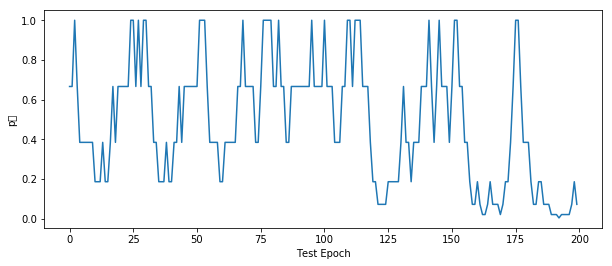

In [43]:
mu = 0.5
# ベルヌーイ分布
init_sample = list(scipy.stats.bernoulli.rvs(mu, size=20))

sample = init_sample
p_value_history = []
for i in range(200):
    # 直近20回の結果を使って検定
    _, p_value = scipy.stats.ttest_1samp(sample[-20:], 0.5)
    p_value_history.append(p_value)
    # 新たにコインを投げて結果を保持
    sample.append(scipy.stats.bernoulli.rvs(mu))
    
plt.figure(figsize=(10, 4))
plt.plot(p_value_history)
plt.xlabel('Test Epoch')
plt.ylabel('p値')

有意差とビジネスインパクト
---------------------

In [47]:
max_sample = 3000000
# 標本A 平均: 45.1%
a = scipy.stats.bernoulli.rvs(0.451, size=max_sample)
# 標本B 平均: 45.2%
b = scipy.stats.bernoulli.rvs(0.452, size=max_sample)
p_values = []
# 5000づつ標本サイズを増やして検定を行う
sample_sizes = np.arange(1000, max_sample, 5000)
for sample_size in sample_sizes:
    _, p_value = scipy